In [ ]:
!pip install kaggle


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c cifar-10


 98% 700M/715M [00:06<00:00, 115MB/s]
100% 715M/715M [00:06<00:00, 110MB/s]


In [ ]:
!ls


cifar-10.zip  kaggle.json  sample_data


In [ ]:
from zipfile import ZipFile
file_name = '/content/cifar-10.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [ ]:
! pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.3/93.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 7.9 MB/s eta 0:00:00


In [ ]:
import py7zr
archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()
archive.close()

In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Importing the Depandancies

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import  matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [ ]:
# List all files in the directory "/content/train" and store the filenames in a list
filenames = os.listdir("/content/train")

# Get the type of the 'filenames' object to understand its data type
type(filenames)

# Get the number of files in the directory by finding the length of the 'filenames' list
len(filenames)



50000

In [ ]:
print(filenames[0:5])
print(filenames[-5:])

['40973.png', '30939.png', '13731.png', '30006.png', '7966.png']
['37079.png', '10103.png', '44800.png', '47268.png', '47086.png']


label processing

In [ ]:
label_df=pd.read_csv('/content/trainLabels.csv')
label_df.shape
label_df.head()
label_df.tail()
label_df.head(10)
label_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


to print a specific row

In [ ]:
label_df[label_df['id']==7796]

,id,label
7795,7796,frog


count each label how many photos it has to make sure that every label can predict correctly

In [ ]:
label_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [ ]:
label_df['label']

,label
0,frog
1,truck
2,truck
3,deer
4,automobile
...,...
49995,bird
49996,frog
49997,truck
49998,automobile


this code is for labeling each name by a specific value(u can see the diff by the code before this one)

In [ ]:
label_dictionary={'airplane':0,'automobile':1,'bird':2,'cat':3,'deer':4,'dog':5,'frog':6,'horse':7,'ship':8,'truck':9}
labels=[label_dictionary[i] for i in label_df['label']]
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


dislplay sample image

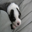

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img=cv2.imread('/content/train/45888.png')
cv2_imshow(img)

In [ ]:
label_df[label_df['id']==45888]

,id,label
45887,45888,dog


In [ ]:
id_list=list(label_df['id'])
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


image processing(convert image into numpy array)

In [ ]:
# Define the path to the training data folder
train_data_folder = '/content/train/'

# Initialize an empty list to store the image data
data = []

# Loop through each ID in the 'id_list'
for id in id_list:
    # Construct the image file path and open the image using PIL (Python Imaging Library)
    image = Image.open(train_data_folder + str(id) + '.png')

    # Convert the image to a NumPy array
    image = np.array(image)

    # Append the processed image data to the 'data' list
    data.append(image)



In [ ]:
type(data)

list

In [ ]:
len(data)

50000

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(32, 32, 3)

convert image list and label list to numpy arryas

In [ ]:
X=np.array(data)
y=np.array(labels)
print(X.shape)
print(y.shape)


(50000, 32, 32, 3)
(50000,)


this represent 50000 images with 32x32 and 3 color images

Train test split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


scaling the data

In [ ]:
# Scale the training data by dividing each pixel value by 255 to normalize it to the range [0, 1]
X_train_scaled = X_train / 255

# Scale the test data by dividing each pixel value by 255 to normalize it to the range [0, 1]
X_test_scaled = X_test / 255

# Print the scaled training data
print(X_train_scaled)

# Print the first instance (image or data sample) in the original training data for comparison
print(X_train[0])


[[[[0.81960784 0.82352941 0.79607843]
   [0.83529412 0.83921569 0.81960784]
   [0.85490196 0.85882353 0.84313725]
   ...
   [0.49803922 0.29019608 0.15294118]
   [0.47843137 0.26666667 0.1372549 ]
   [0.45490196 0.24705882 0.1254902 ]]

  [[0.82352941 0.82352941 0.79215686]
   [0.83529412 0.83921569 0.81176471]
   [0.85490196 0.8627451  0.83921569]
   ...
   [0.48627451 0.2745098  0.1372549 ]
   [0.4745098  0.2627451  0.12941176]
   [0.48235294 0.27058824 0.14117647]]

  [[0.80784314 0.80392157 0.76470588]
   [0.81960784 0.81960784 0.79215686]
   [0.83529412 0.84313725 0.81960784]
   ...
   [0.48627451 0.2745098  0.14509804]
   [0.51372549 0.30196078 0.16470588]
   [0.51372549 0.30588235 0.16078431]]

  ...

  [[0.49803922 0.42352941 0.38039216]
   [0.54117647 0.47843137 0.43137255]
   [0.55294118 0.49803922 0.4627451 ]
   ...
   [0.61960784 0.58431373 0.5254902 ]
   [0.63137255 0.61176471 0.59215686]
   [0.53333333 0.5372549  0.58039216]]

  [[0.56862745 0.50980392 0.46666667]
   [0.5

building the neural network

In [ ]:
import tensorflow as tf
from tensorflow import keras


setting up the layers for neural Network

In [ ]:
num_of_classes = 10

# Create a Sequential model
model = keras.Sequential([
    # Flatten layer: Converts 3D input (32x32x3) into a 1D array for the Dense layers
    keras.layers.Flatten(input_shape=(32, 32, 3)),

    # Dense layer: Fully connected layer with 64 neurons and ReLU activation
    keras.layers.Dense(64, activation='relu'),

    # Dense layer: Fully connected layer with 10 neurons and ReLU activation
    keras.layers.Dense(10, activation='relu'),

    # Output Dense layer: Fully connected layer with 'num_of_classes' neurons and softmax activation
    # Softmax is used for multi-class classification
    keras.layers.Dense(num_of_classes, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compile the nueral network

In [ ]:
model.compile(
    optimizer='adam',                      # Optimizer used for training
    loss='sparse_categorical_crossentropy', # Loss function for multi-class classification
    metrics=['accuracy']                   # Metric to evaluate model performance
)


training the neual network

In [ ]:
model.fit(X_train_scaled,y_train,validation_split=0.1,epochs=10)


Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.0973 - loss: 2.3048 - val_accuracy: 0.0878 - val_loss: 2.3029
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.0996 - loss: 2.3027 - val_accuracy: 0.1013 - val_loss: 2.3027
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.0996 - loss: 2.3027 - val_accuracy: 0.1018 - val_loss: 2.3026
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.0972 - loss: 2.3027 - val_accuracy: 0.1018 - val_loss: 2.3027
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.0981 - loss: 2.3028 - val_accuracy: 0.1018 - val_loss: 2.3027
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.0976 - loss: 2.3027 - val_accuracy: 0.1020 - val_loss: 2.3028
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.0972 - loss: 2.3027 - val_accuracy: 0.1032 - val_loss: 2.3029
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.1038 - loss: 2.30

**ResNet50**

In [ ]:
from tensorflow.keras import Sequential, models, layers  # Import key modules for creating and managing models and layers
from tensorflow.keras.layers import Dense, Dropout, Flatten  # Import specific layer types for fully connected layers, dropout, and flattening
from tensorflow.keras.layers import BatchNormalization  # Import BatchNormalization layer to normalize inputs for each batch
from tensorflow.keras.models import load_model  # Import functionality to load pre-trained models from disk
from tensorflow.keras.models import Model  # Import base Model class for building and extending models
from tensorflow.keras.applications.resnet50 import ResNet50  # Import the ResNet50 architecture pre-trained on ImageNet
from tensorflow.keras import optimizers  # Import optimizers for configuring model optimization during training


In [ ]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
# Load the ResNet50 model pre-trained on the ImageNet dataset.
# weights='imagenet': Use the weights learned during training on ImageNet.
# include_top=False: Exclude the fully connected top layers, keeping only the convolutional base.
# input_shape=(256,256,3): Set the input shape to 256x256 images with 3 color channels (RGB).

convolutional_base.summary()
# Display a summary of the convolutional base, showing the layers, output shapes, and number of parameters.


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:

num_of_classes = 10
# Define the number of output classes for the model (e.g., 10 classes for classification).

model = models.Sequential()
# Initialize a sequential model where layers are added one by one.

model.add(layers.UpSampling2D((2, 2)))
# Upsample the input by a factor of 2 along both dimensions (height and width).

model.add(layers.UpSampling2D((2, 2)))
# Further upsample the input by a factor of 2 along both dimensions.

model.add(layers.UpSampling2D((2, 2)))
# Repeat the upsampling again to increase the spatial dimensions of the input.

model.add(convolutional_base)
# Add the pre-trained ResNet50 convolutional base to extract features from the upsampled input.

model.add(layers.Flatten())
# Flatten the 3D feature maps output by the convolutional base into a 1D vector for input to the dense layers.

model.add(layers.BatchNormalization())
# Add Batch Normalization to normalize inputs to the next layer, improving training stability.

model.add(layers.Dense(128, activation='relu'))
# Add a dense (fully connected) layer with 128 units and ReLU activation for feature learning.

model.add(layers.Dropout(0.5))
# Add Dropout with a rate of 50% to prevent overfitting by randomly deactivating neurons during training.

model.add(layers.BatchNormalization())
# Normalize inputs to the next dense layer for better convergence.

model.add(layers.Dense(64, activation='relu'))
# Add another dense layer with 64 units and ReLU activation for additional feature learning.

model.add(layers.Dropout(0.5))
# Apply another Dropout layer with a 50% rate to further reduce overfitting.

model.add(layers.BatchNormalization())
# Normalize inputs again before the final dense layer.

model.add(layers.Dense(num_of_classes, activation='softmax'))
# Add the final output layer with `num_of_classes` neurons and softmax activation for multi-class classification.


In [ ]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              # Compile the model using the RMSprop optimizer with a small learning rate (2e-5) for fine-tuning.
              # RMSprop is effective for models like this, as it adapts the learning rate for each parameter.

              loss='sparse_categorical_crossentropy',
              # Specify the loss function as sparse categorical crossentropy.
              # This is used for multi-class classification when the labels are integers (not one-hot encoded).

              metrics=['accuracy'])
              # Use accuracy as the evaluation metric to track the model's performance during training.


In [ ]:
history=model.fit(X_train_scaled,y_train,validation_split=0.1,epochs=10)


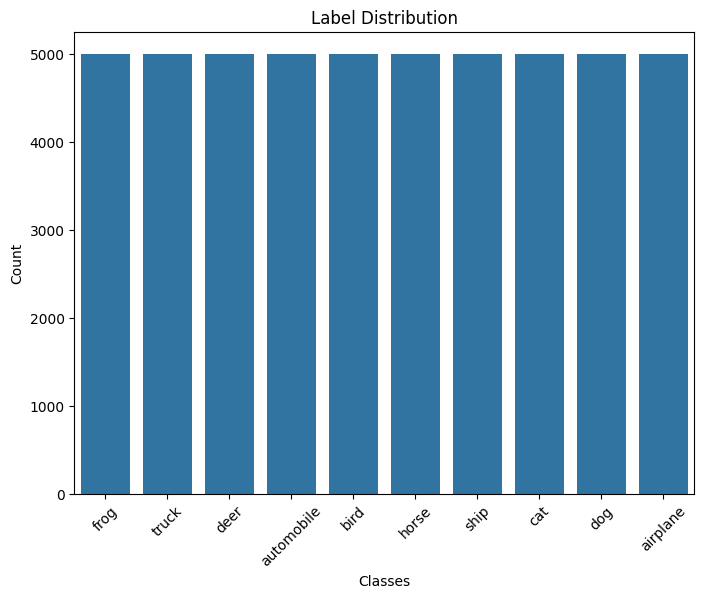

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x=label_df['label'])
plt.title("Label Distribution")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

testing the machine

In [ ]:
h=history
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()


NameError: name 'history' is not defined

plot the accuracy value

In [ ]:
plt.plot(h.history['accuracy'],label='train accuracy')
plt.plot(h.history['val_accuracy'],label='validation accuracy')
plt.legend()
plt.show()

NameError: name 'h' is not defined

print the accuracy

In [ ]:
loss,accuracy=model.evaluate(X_test_scaled,y_test)
print('test accuracy= ',accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2829s 9s/step


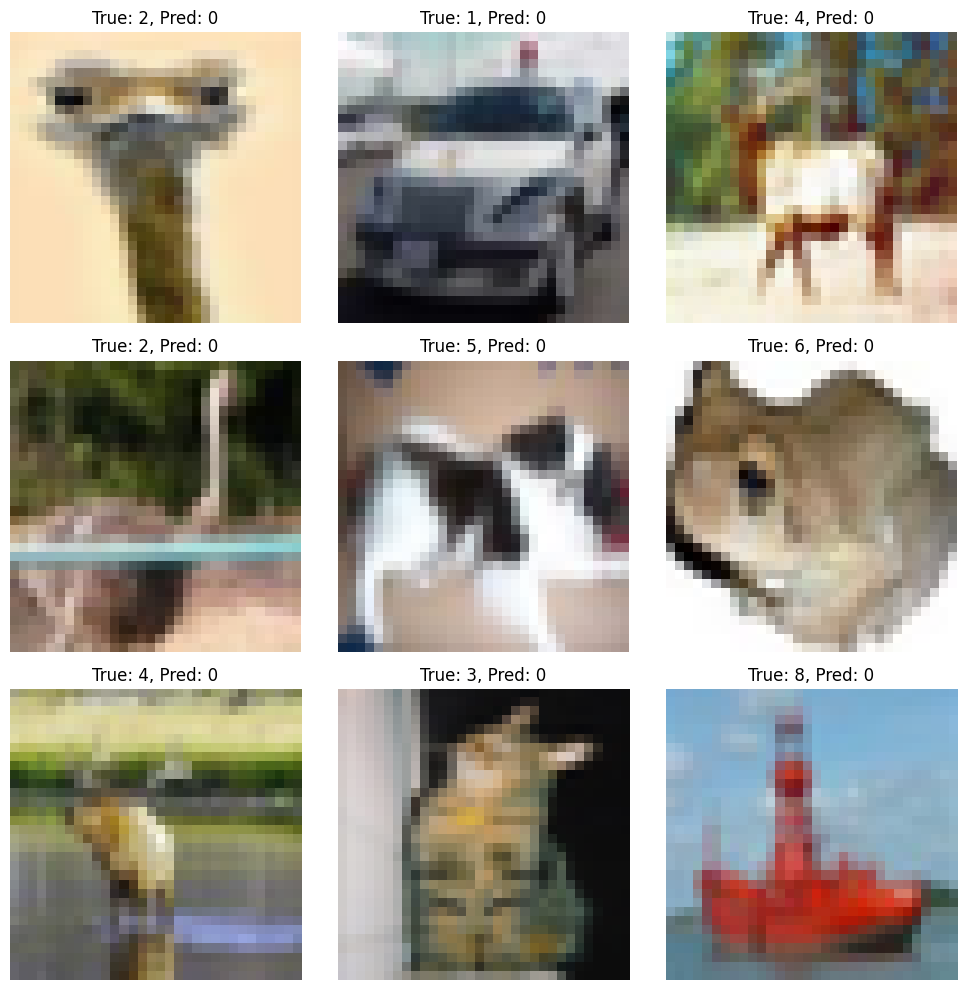

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test_scaled).argmax(axis=1)

# Identify misclassified samples
misclassified_idx = np.where(y_pred != y_test)[0]

# Display some misclassified images
plt.figure(figsize=(10, 10))
for i, idx in enumerate(misclassified_idx[:9]):  # Display first 9 misclassified
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[idx])
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()